In [52]:
import os
import pandas as pd
import json
import requests
import configparser
import matplotlib.pyplot as plt

## Data Dicitionary:

Site = https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf
    
PRCP = Precipitation (mm or inches as per user preference, inches to hundredths on Daily Form pdf file)

SNOW = Snowfall (mm or inches as per user preference, inches to tenths on Daily Form pdf file)

SNWD = Snow depth (mm or inches as per user preference, inches on Daily Form pdf file)

TMAX = Maximum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on
Daily Form pdf file

TMIN = Minimum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on
Daily Form pdf file

# Exploratory Data Analysis

In [41]:
#Call API and concat into one Pandas dataframe
ROOT_DIR, af_directory = os.path.split(os.environ['AIRFLOW_HOME'])
CONFIG_PATH = os.path.join(ROOT_DIR, 'tokens.ini')
config = configparser.ConfigParser()
config.read(CONFIG_PATH)
noaa_token = config.get('WEATHER', 'Token')

weather_data_types = ["TMIN", "TMAX", "PRCP", "SNOW", "SNWD"]
years = list(range(2014, 2019))


df_list = []
for datatype in weather_data_types:
    for year in years:
        req_string = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data?" \
                f"datasetid=GHCND&datatypeid={datatype}&limit=1000&" \
                "stationid=GHCND:USW00094728&" \
                f"startdate={year}-01-01&enddate={year}-12-31&" \
                "units=standard&" \
                "includemetadata=False"

        response = requests.get(req_string, headers={'token':noaa_token})
        weather_data = response.json()["results"]
        df = pd.read_json(json.dumps(weather_data))
        df_list.append(df)

weather_df = pd.concat(df_list)

In [42]:
weather_df.shape

(9130, 5)

In [43]:
weather_df.head(5)

,date,datatype,station,attributes,value
0,2014-01-01,TMIN,GHCND:USW00094728,",,W,2400",24.0
1,2014-01-02,TMIN,GHCND:USW00094728,",,W,2400",18.0
2,2014-01-03,TMIN,GHCND:USW00094728,",,W,2400",9.0
3,2014-01-04,TMIN,GHCND:USW00094728,",,W,2400",8.0
4,2014-01-05,TMIN,GHCND:USW00094728,",,W,2400",27.0


In [44]:
weather_df = weather_df.pivot(index="date", columns="datatype", values="value") 
weather_df.head(5)

datatype,PRCP,SNOW,SNWD,TMAX,TMIN
date,,,,,
2014-01-01,0.00,0.0,0.0,33.0,24.0
2014-01-02,0.33,3.1,0.0,33.0,18.0
2014-01-03,0.29,3.3,5.9,18.0,9.0
2014-01-04,0.00,0.0,5.9,29.0,8.0
2014-01-05,0.14,0.0,3.9,40.0,27.0


In [45]:
weather_df.shape

(1826, 5)

In [46]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2014-01-01 to 2018-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRCP    1826 non-null   float64
 1   SNOW    1826 non-null   float64
 2   SNWD    1826 non-null   float64
 3   TMAX    1826 non-null   float64
 4   TMIN    1826 non-null   float64
dtypes: float64(5)
memory usage: 85.6 KB


In [47]:
weather_df.describe()

datatype,PRCP,SNOW,SNWD,TMAX,TMIN
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,0.135553,0.114677,0.589923,63.300657,49.066813
std,0.363217,0.980033,2.371224,18.571682,17.326895
min,0.000000,0.000000,0.000000,13.000000,-1.000000
25%,0.000000,0.000000,0.000000,48.000000,36.000000
50%,0.000000,0.000000,0.000000,65.000000,50.000000
75%,0.060000,0.000000,0.000000,80.000000,65.000000
max,4.970000,27.300000,22.000000,97.000000,82.000000


In [48]:
new_col_name = {"PRCP":"precipitation",
                "SNOW":"snowfall", "SNWD":"snow_depth",
                "TMAX":"max_temp", "TMIN":"min_temp"}

weather_df.rename(columns=new_col_name, inplace=True)
weather_df.columns

Index(['precipitation', 'snowfall', 'snow_depth', 'max_temp', 'min_temp'], dtype='object', name='datatype')

In [49]:
weather_df.isnull().sum()

datatype
precipitation    0
snowfall         0
snow_depth       0
max_temp         0
min_temp         0
dtype: int64

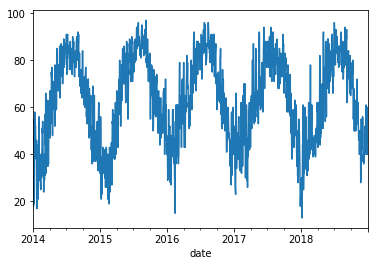

In [53]:
#Daily max temp plot
weather_df.max_temp.plot()
plt.show()

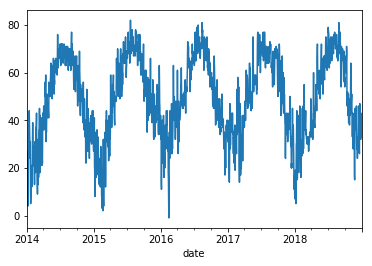

In [54]:
#Daily min temp plot
weather_df.min_temp.plot()
plt.show()

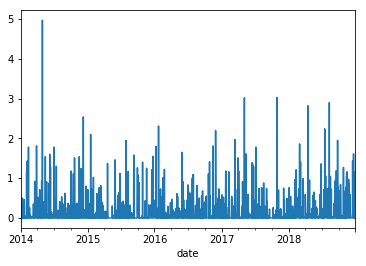

In [55]:
# Daily precipitation
weather_df.precipitation.plot()
plt.show()

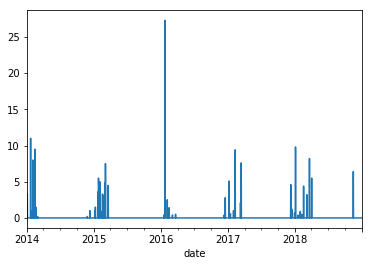

In [56]:
#Daily snowfall reading
weather_df.snowfall.plot()
plt.show()

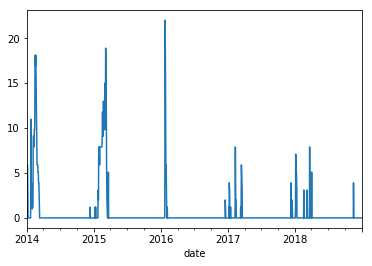

In [57]:
#Daily snow depth reading
weather_df.snow_depth.plot()
plt.show()